# Cell Averager

### Initial imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

from matplotlib import pyplot as plt

In [2]:
#ehooke = r"C:\Users\abrito\Desktop\eHooke_1.0_AB"
#ehooke = r"C:\Users\abrito\Desktop\eHooke-master"
ehooke = r"C:\Users\abrito\Desktop\eHooke_1.0-BS"
sys.path.append(ehooke)

from images import ImageManager
from parameters import MaskParameters, RegionParameters, CellParameters, ParametersManager
from segments import SegmentsManager
from cells import CellManager
from cellcycleclassifier import CellCycleClassifier

from model import ExperimentalCondition, Replicate

Using TensorFlow backend.


In [3]:
root_folder = r"C:\Users\abrito\Desktop\ORI_TER\oriter_andreia\origreen-terred"
experiments = [os.path.join(root_folder, f) for f in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, f))]

fluor1 = "GFP"
fluor2 = "TexasRed"
base = "Phase"
membrane = 'none'
basetype = "Phase"

exp_objects = [ExperimentalCondition(condition, fluor1, fluor2, membrane, base, basetype) for condition in experiments]
models_gfp_ori = [e.askformodel(channel=1, modeltype='spot', minspots=1, cellcycle=(0,)) for e in exp_objects]
models_texasred_ter = [e.askformodel(channel=2, modeltype='spot', minspots=1, cellcycle=(0,)) for e in exp_objects]

In [4]:
root_folder = r"C:\Users\abrito\Desktop\ORI_TER\oriter_andreia\oriyellow-terblue"
experiments = [os.path.join(root_folder, f) for f in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, f))]

fluor1 = "YFP"
fluor2 = "CFP"
base = "Phase"
membrane = 'none'
basetype = "Phase"

exp_objects = [ExperimentalCondition(condition, fluor1, fluor2, membrane, base, basetype) for condition in experiments]
models_YFP_ori = [e.askformodel(channel=1, modeltype='spot', minspots=1, cellcycle=(0,)) for e in exp_objects]
models_CFP_ter = [e.askformodel(channel=2, modeltype='spot', minspots=1, cellcycle=(0,)) for e in exp_objects]

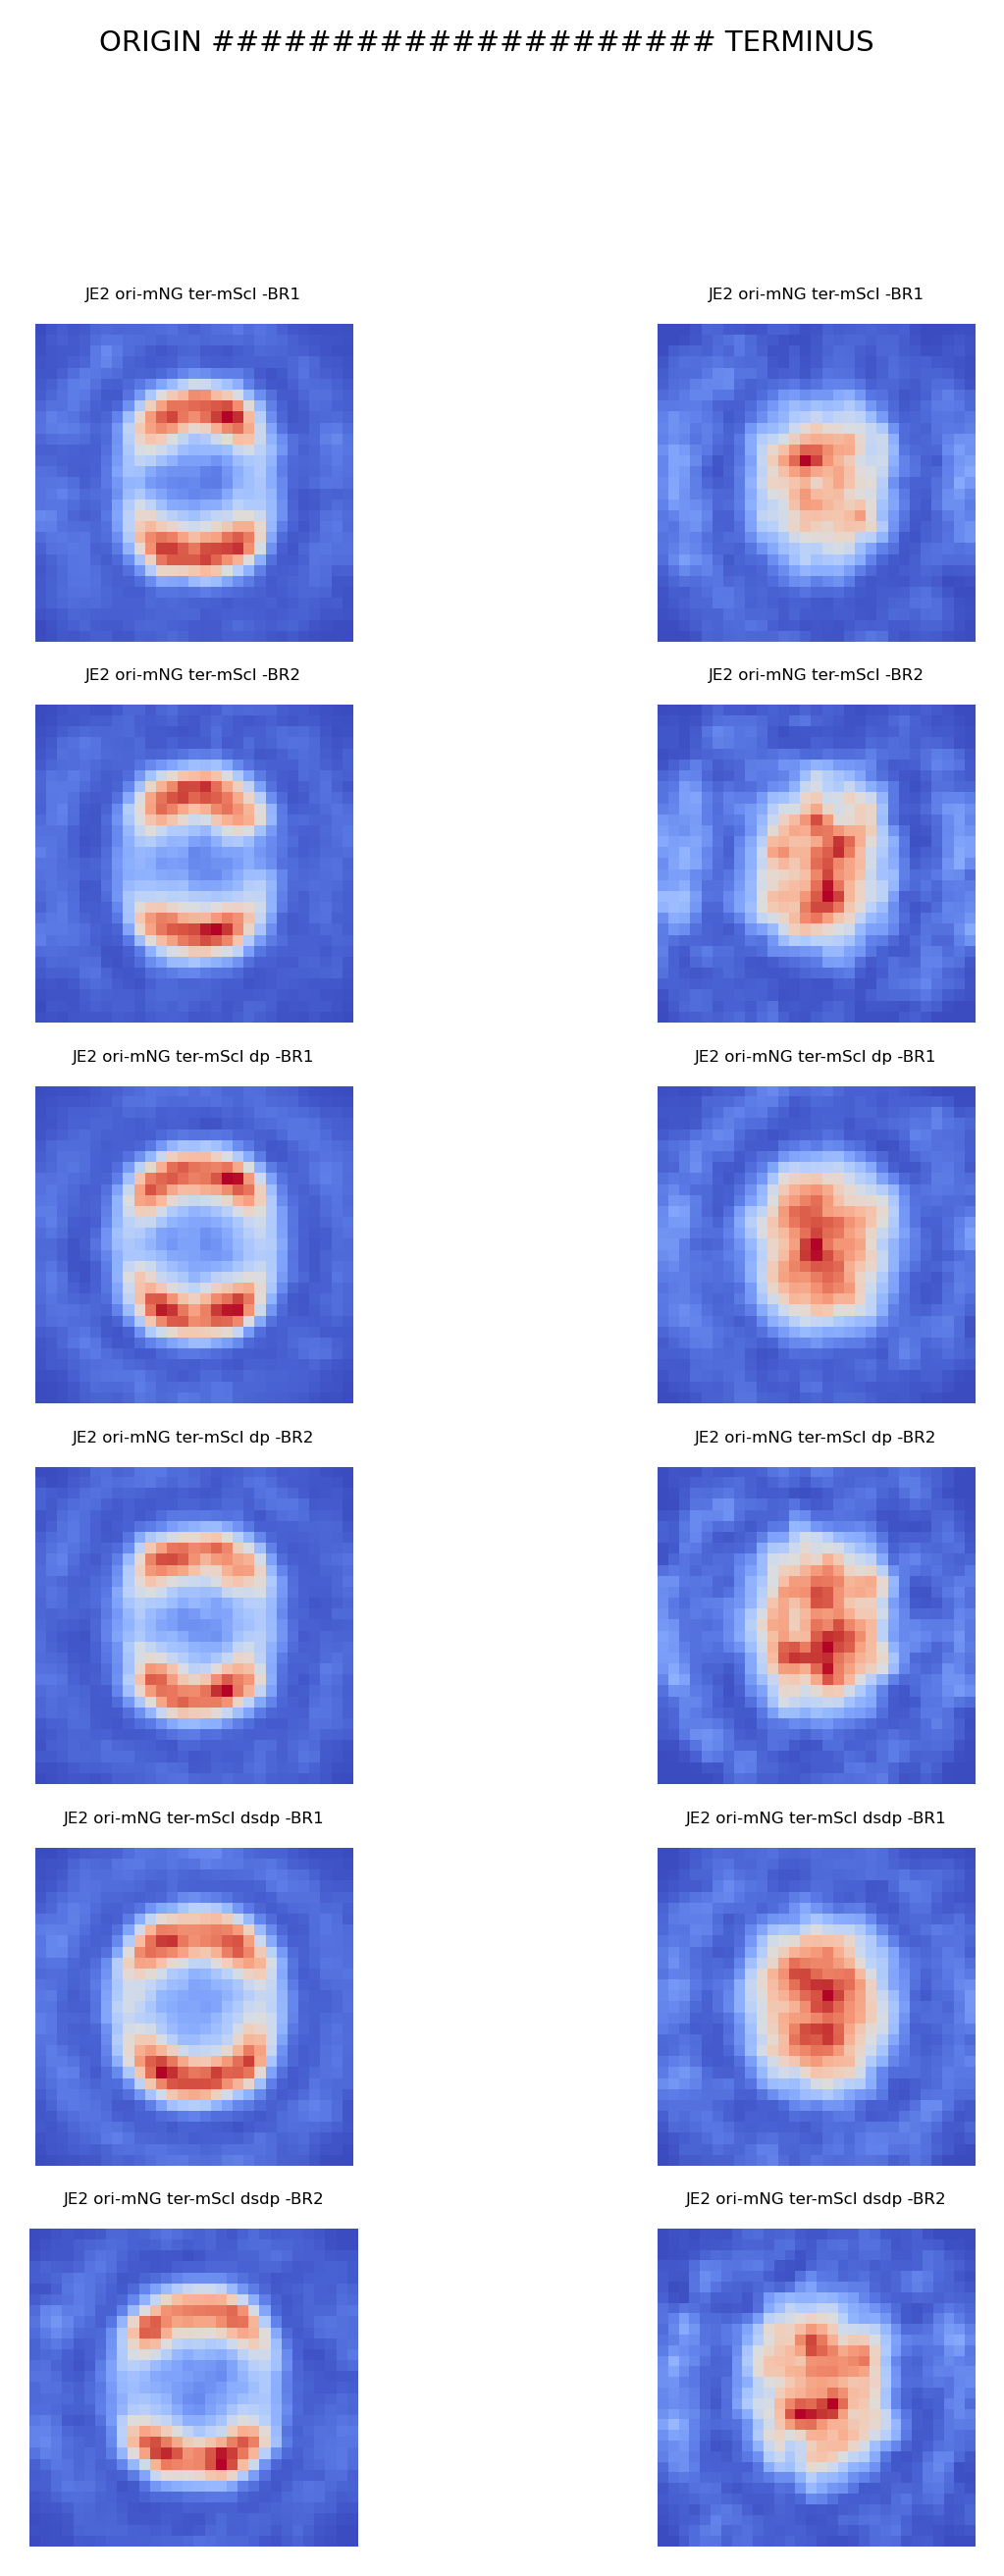

In [37]:
from matplotlib import pyplot as plt

root_folder = r"C:\Users\abrito\Desktop\ORI_TER\oriter_andreia\origreen-terred"
experiments = [f for f in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, f))]

fig, ax = plt.subplots(len(models_gfp_ori), 2, figsize=(5,10), dpi=300)

for i in range(len(models_gfp_ori)):    
    ori = models_gfp_ori[i]
    ter = models_texasred_ter[i]

    ax[i,0].imshow(ori, cmap='coolwarm')
    ax[i,1].imshow(ter, cmap='coolwarm')
    
    ax[i,0].axis('off')
    ax[i,1].axis('off')
    
    ax[i,0].set_title(experiments[i], fontsize=4)
    ax[i,1].set_title(experiments[i], fontsize=4)

    
plt.suptitle("ORIGIN ##################### TERMINUS", fontsize=7)
plt.savefig("GFP_TexasRed.jpeg")


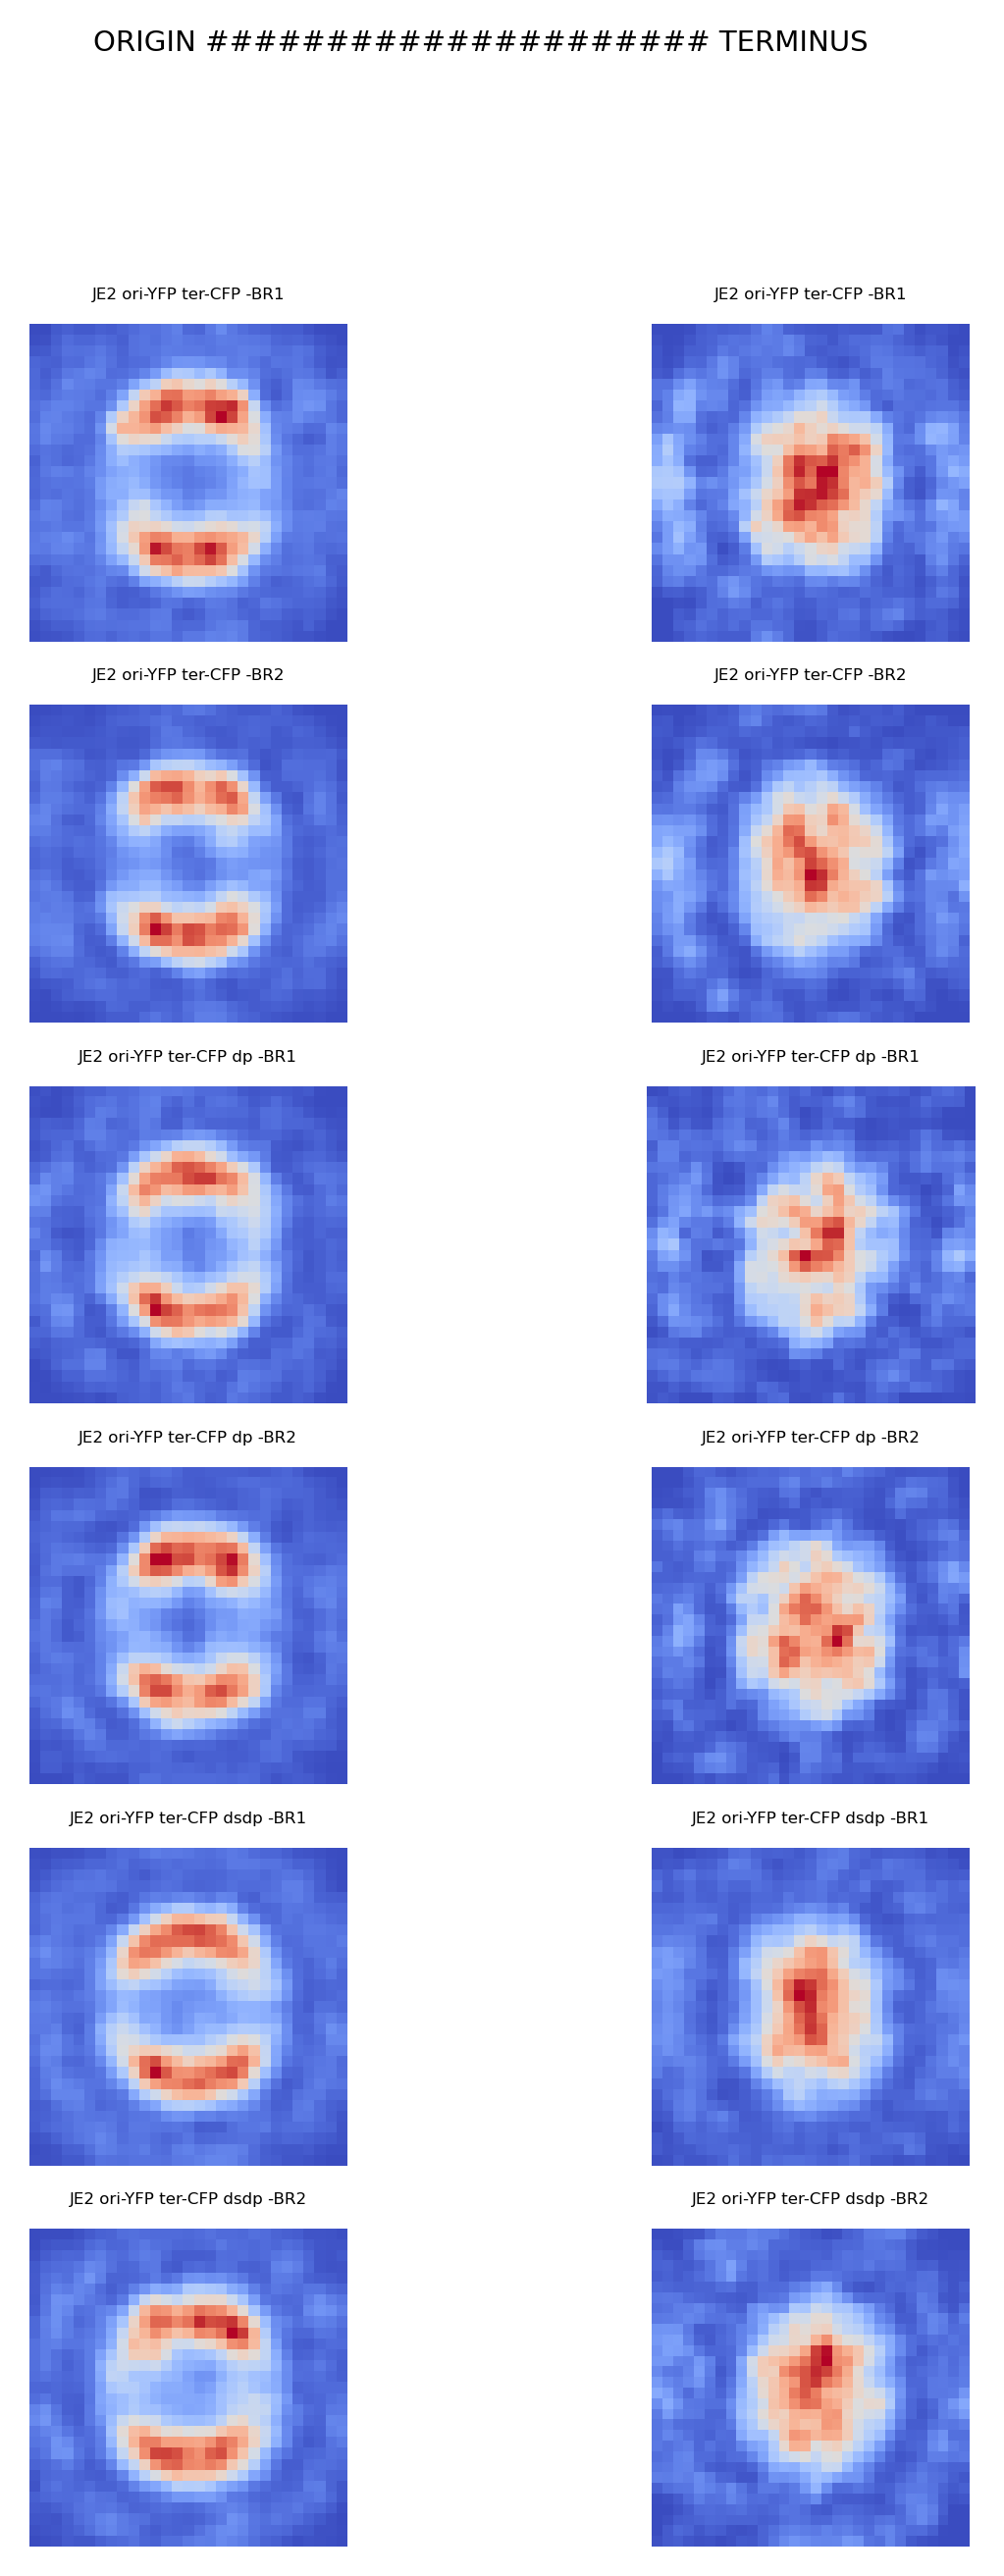

In [38]:
from matplotlib import pyplot as plt

root_folder = r"C:\Users\abrito\Desktop\ORI_TER\oriter_andreia\oriyellow-terblue"
experiments = [f for f in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, f))]

fig, ax = plt.subplots(len(models_YFP_ori), 2, figsize=(5,10), dpi=300)

for i in range(len(models_YFP_ori)):    
    ori = models_YFP_ori[i]
    ter = models_CFP_ter[i]

    ax[i,0].imshow(ori, cmap='coolwarm')
    ax[i,1].imshow(ter, cmap='coolwarm')
    
    ax[i,0].axis('off')
    ax[i,1].axis('off')
    
    ax[i,0].set_title(experiments[i], fontsize=4)
    ax[i,1].set_title(experiments[i], fontsize=4)

    
plt.suptitle("ORIGIN ##################### TERMINUS", fontsize=7)
plt.savefig("YFP_CFP.jpeg")
